<a href="https://colab.research.google.com/github/Remaaa17/Data_Preprocessing-ML/blob/main/Clustring_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries

import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import missingno as msno

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
file_path = r"/content/Mall_Customers.csv"
Mall_df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame
print("Mall_Customers DataFrame:")
Mall_df.head()

Mall_Customers DataFrame:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
Mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
Mall_df.T

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
CustomerID,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
Gender,Male,Male,Female,Female,Female,Female,Female,Female,Male,Female,...,Female,Female,Male,Female,Female,Female,Female,Male,Male,Male
Age,19,21,20,23,31,22,35,23,64,30,...,34,32,33,38,47,35,45,32,32,30
Annual Income (k$),15,15,16,16,17,17,18,18,19,19,...,103,103,113,113,120,120,126,126,137,137
Spending Score (1-100),39,81,6,77,40,76,6,94,3,72,...,23,69,8,91,16,79,28,74,18,83


In [ ]:
Mall_df.shape

(200, 5)

In [ ]:
misiing_value= Mall_df.isnull().sum()
misiing_value

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

>>**No null values present in the data!**

In [ ]:
Mall_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
Mall_df.rename(columns={
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

# Display the first few rows of the dataset
Mall_df.head()


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
Mall_df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


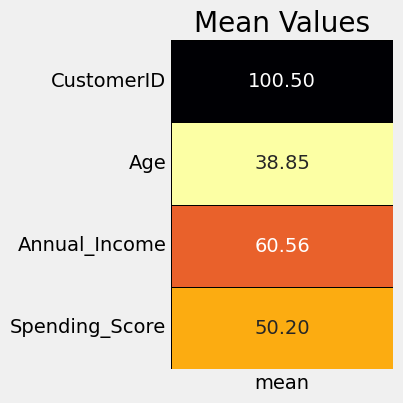

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))

plt.subplot(1,1,1)
sns.heatmap(Mall_df.describe().T[['mean']],cmap = 'inferno_r',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 3)

* Average customer Age in the dataset is in the late 30s i.e 38.85.

* Average Annual Income of the customers is 60.56 i.e just short of the 2018 median income of USA citizen, 63k$.

* Spending Score  average of the mall customer is in the center with 50.20.

In [ ]:
px.scatter(data_frame = Mall_df, x = 'Annual_Income', y = 'Spending_Score',
          title = 'Relation between Annual Income and Spending Score')

>>There is no relation between the customers having annual income in the range of 20-40k and 80-140k but there is relation between customers who have annual income in the range of 40-60k.

In [ ]:
col = list(Mall_df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(Mall_df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Gender
Numerical Features : CustomerID Age Annual_Income Spending_Score


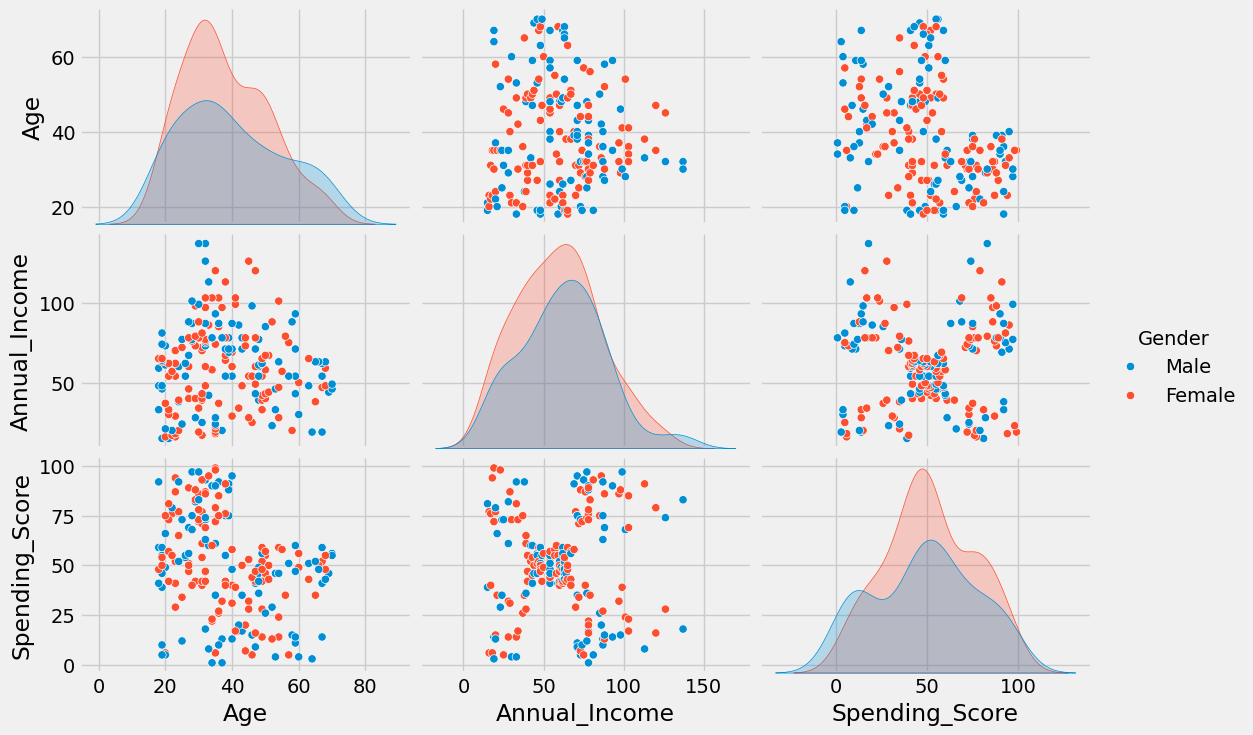

In [ ]:
# Let's see our data in a detailed way with pairplot
X = Mall_df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(Mall_df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

>>**From the above plot we see that gender has no direct relation to segmenting customers. That's why we can drop it and move on with other features which is why we will X parameter from now on.**

####Distribution of  Numerical Features :

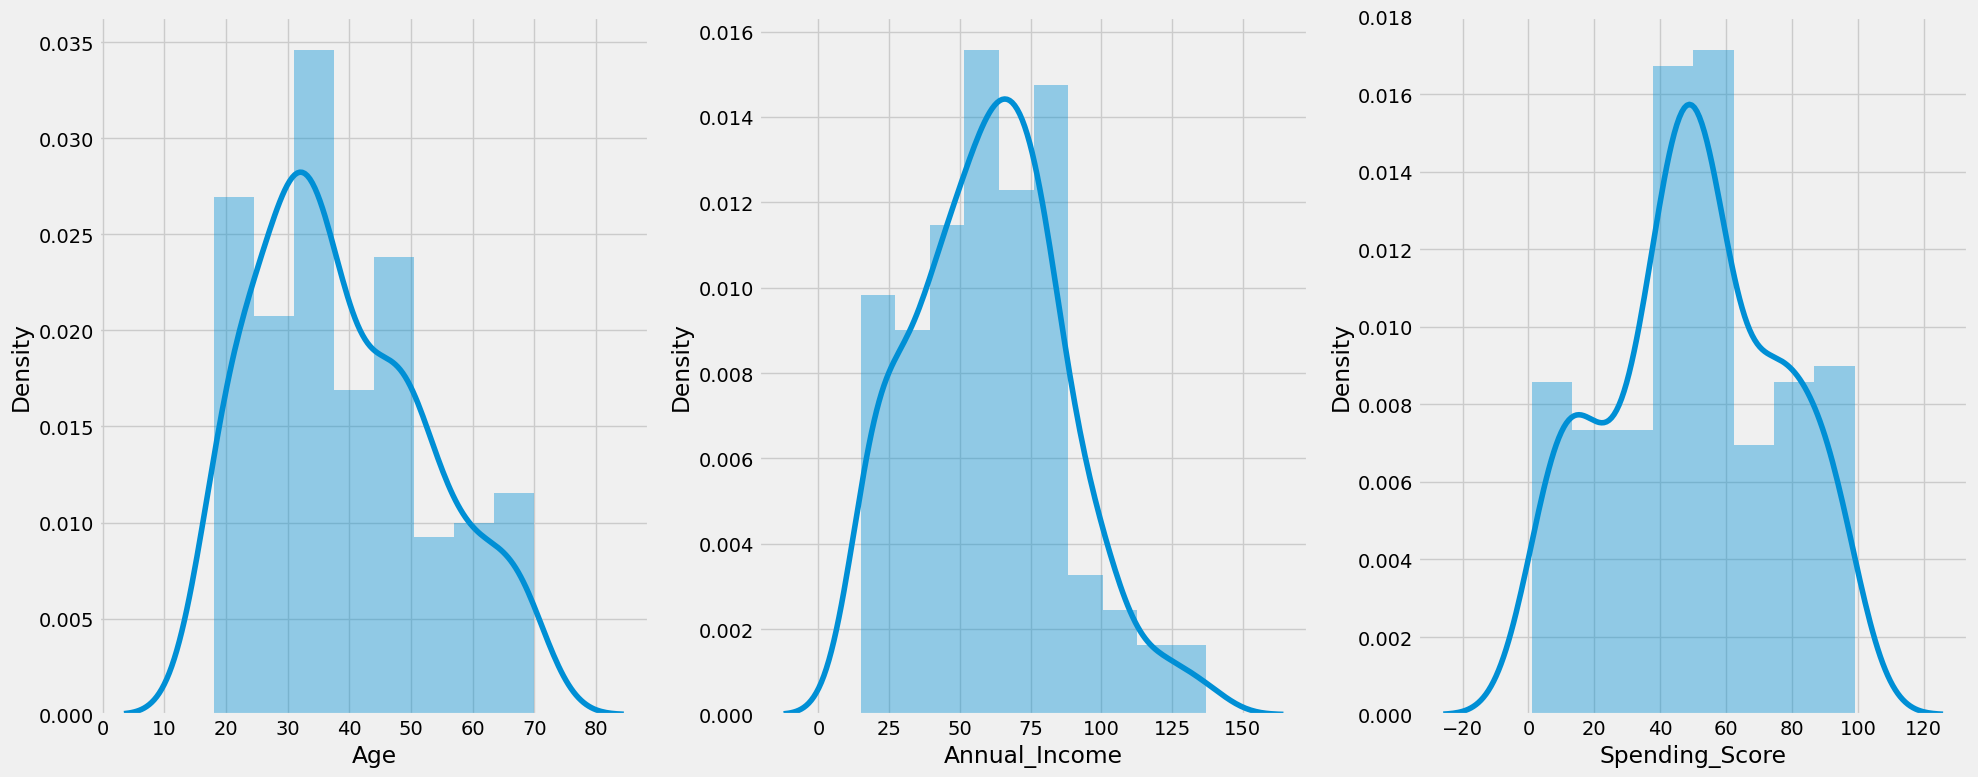

In [ ]:
# distribution plots

plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['Age', 'Annual_Income', 'Spending_Score']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.distplot(Mall_df[col])

    plotnumber += 1

plt.tight_layout()
plt.show()

* Age group near 30-40 have the highest density.
* Most customers have income in range of 50-80k.
* Most of the customers have spending score of 50.


###Target col

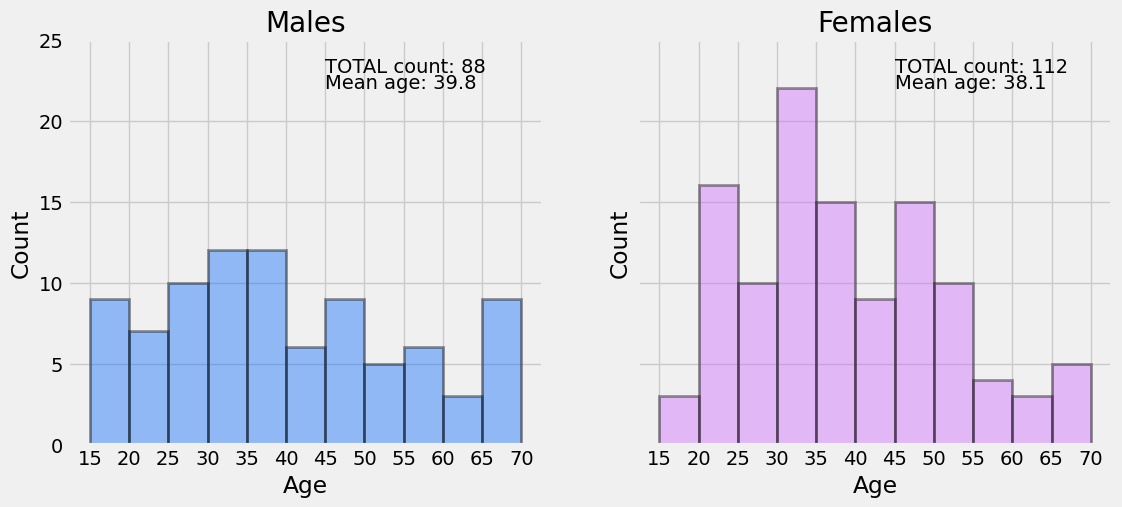

In [ ]:
males_age = Mall_df[Mall_df['Gender']=='Male']['Age'] # subset with males age
females_age = Mall_df[Mall_df['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

>>The average age of male customers is lightly higher than female ones (39.8 versus 38.1). Distribution of male age is more uniform than females, where we can observe that the biggest age group is 30-35 years old. Kolgomorov-Smirnov test shows that the differences between these two groups are statistically insignificant.

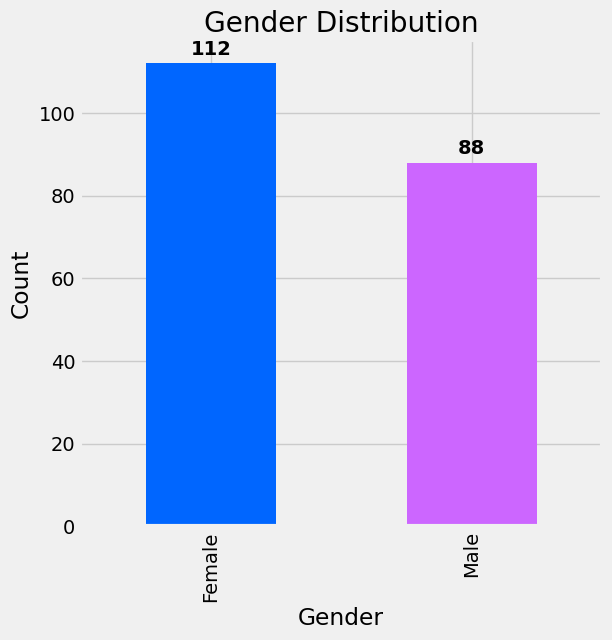

In [ ]:


# Count the number of occurrences of each gender
gender_counts = Mall_df['Gender'].value_counts()

# Create a bar chart
fig, ax = plt.subplots(figsize=(6, 6))
bars = gender_counts.plot(kind='bar', color=['#0066ff', '#cc66ff'], ax=ax)

# Set the title and labels
ax.set_title('Gender Distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Add the count labels on top of the bars
for bar in bars.patches:
    ax.annotate(f'{bar.get_height()}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', color='black', fontweight='bold')

# Show the plot
plt.show()


>>There are slightly more female customers than male ones (112 vs. 87). Females are 56% of total customers.

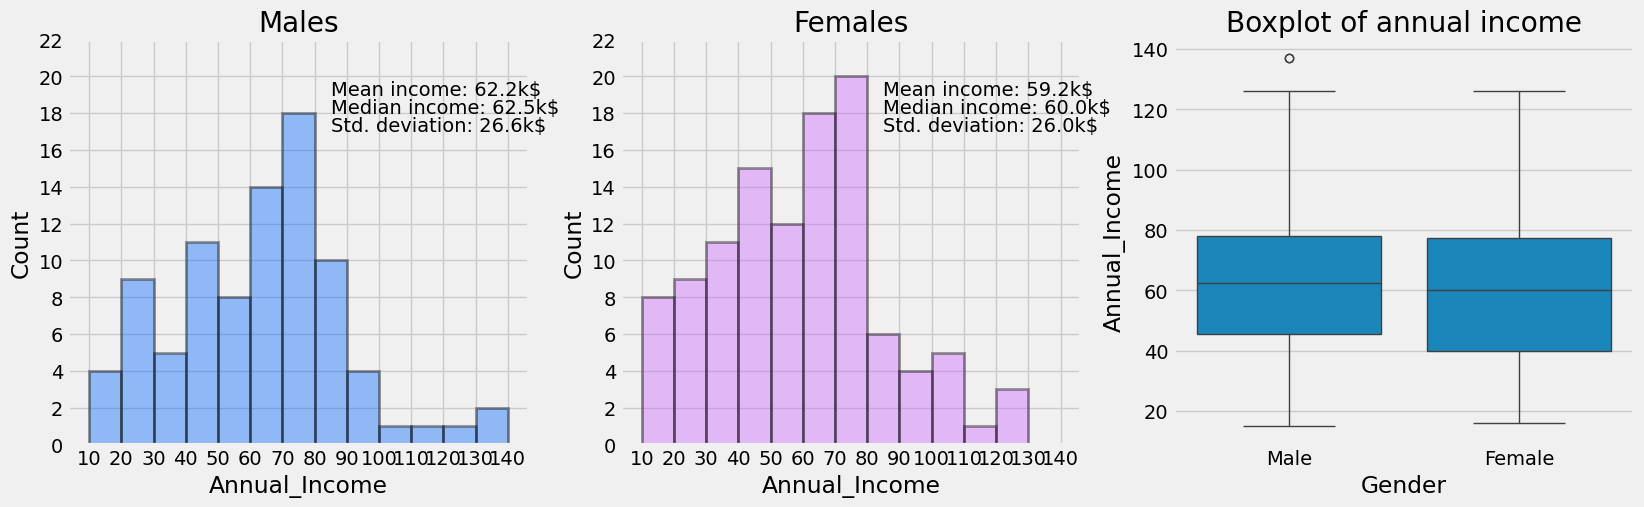

In [ ]:
males_income = Mall_df[Mall_df['Gender']=='Male']['Annual_Income'] # subset with males income
females_income = Mall_df[Mall_df['Gender']=='Female']['Annual_Income'] # subset with females income

my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual_Income', data=Mall_df, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

>>Mean income of males is higher than females (62.2 k$ vs. 59.2k\$). Also median income of male customers (62.5k$) is higher thn female ones (60k\$). Standard deviation is similar for both groups. There is one outlier in male group with an annual income of about 140k$. K-S test shows that these two groups are not statistically different.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data= Mall_df.copy(deep = True)


Mall_df['Gender'] = le.fit_transform(Mall_df['Gender'])

print('Label Encoder Transformation')
print(Mall_df['Gender'].unique(),' = ',le.inverse_transform(Mall_df['Gender'].unique()))

Label Encoder Transformation
[1 0]  =  ['Male' 'Female']


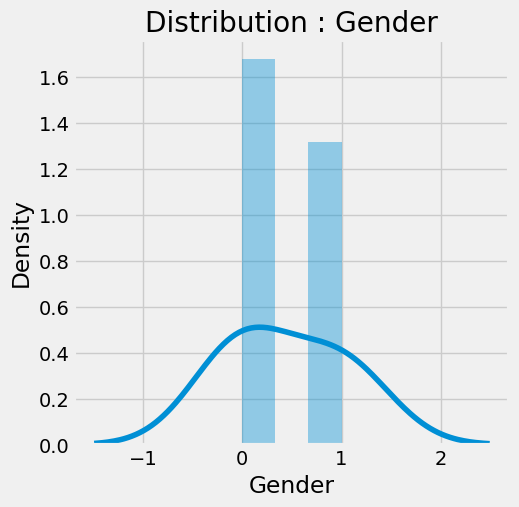

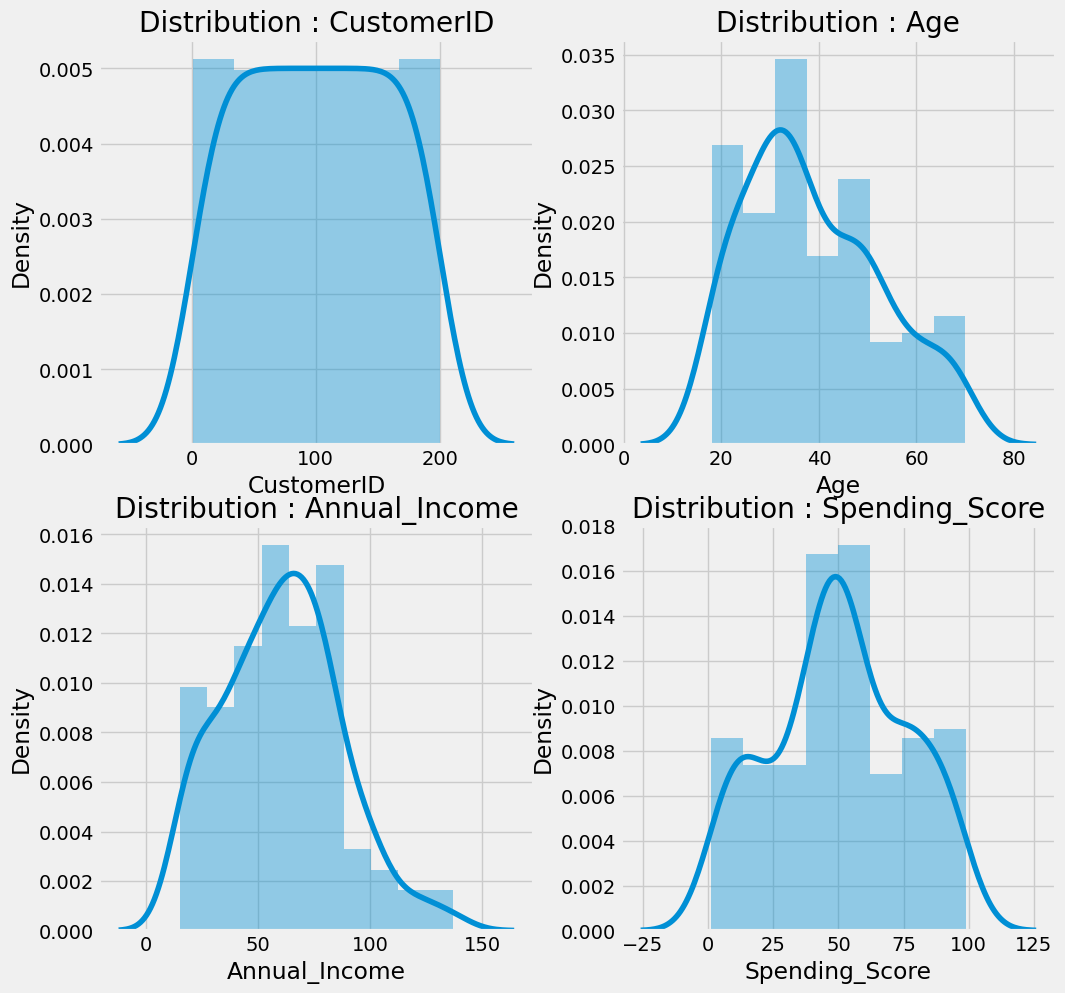

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5))
for i in range(len(categorical_features)):
    plt.subplot(1,1,i+1)
    sns.distplot(Mall_df[categorical_features[i]],kde_kws = {'bw' : 1});
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (11,11))
for i in range(len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.distplot(Mall_df[numerical_features[i]],)
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

* Gender, the only categorical feature, data displays a normally distribution.
* Distribution of Age and Annual Income (k$) is positively or righly skewed.
* Spending Score (1-100) data distribution is similar to the Head and Shoulder pattern observed in stock charts.
* It displays a stock's price rising to a peak and then declines back to the base of the prior up-move.
* Something similar can be observed with the 2 shoulders forming around the values 20 & 80 with head being centered in between 40 - 60.
*>>We will drop the CustomerID feature as it is just a number that is tagged to a customer.

###Correlation Matrix :

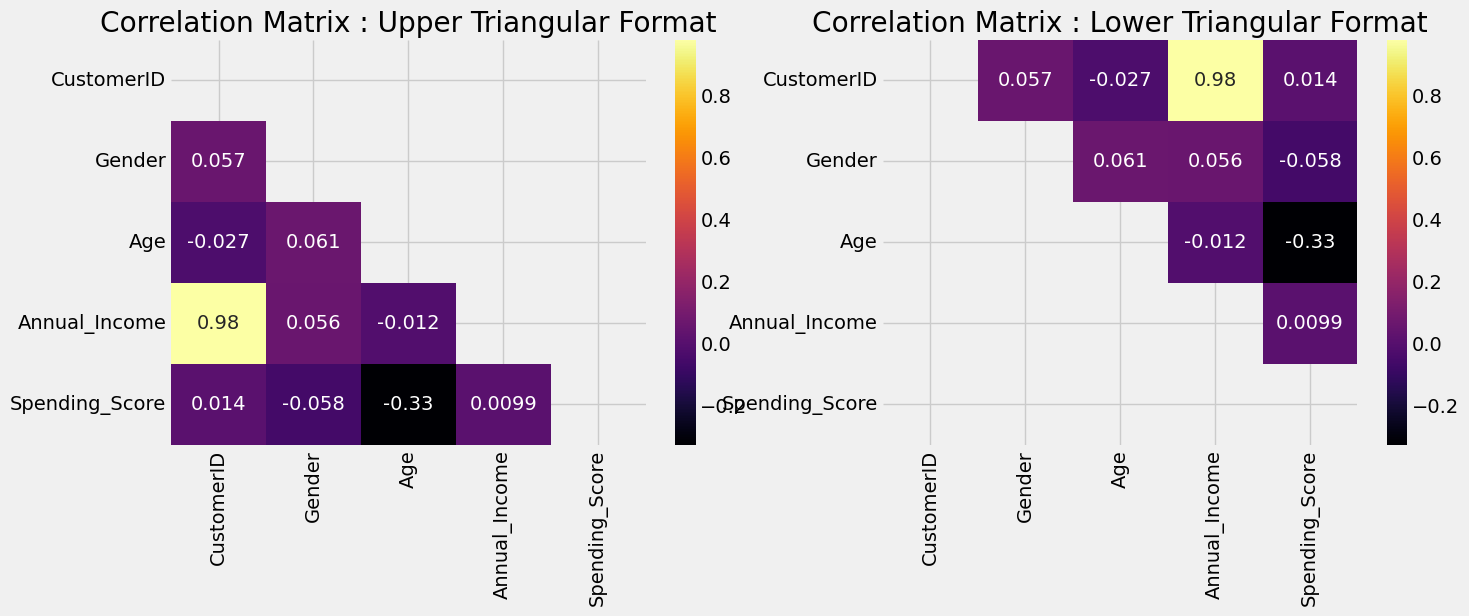

In [ ]:
ut = np.triu(Mall_df.corr())
lt = np.tril(Mall_df.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(Mall_df.corr(),cmap = 'inferno',annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(Mall_df.corr(),cmap = 'inferno',annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');


* Both the matrix displayed are same! It is only done for visualization
purpose. This trick can be used when the dataset has too many features to look into!
* CustomerID displays a very high positive correlation with Annual Income as the customers are arranged in ascending order according to their Annual Income. We are not going to include CustomerID for modeling purpose.Gender does not display any relation with other features. It is pretty much neutral with all the values sticking to 0.
* Spending Score  and Age display a negative correlation i.e if value of one feature increases, then another feature's value decreases and vice-versa is true!




In [ ]:
# dropping useless column

Mall_df.drop('CustomerID', axis = 1, inplace = True)

### Data Scaling :

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
Mall_df['Age'] = mms.fit_transform(Mall_df[['Age']])
Mall_df['Annual_Income'] = mms.fit_transform(Mall_df[['Annual_Income']])
Mall_df['Spending_Score'] = mms.fit_transform(Mall_df[['Spending_Score']])

###Clustering

In [ ]:
# Select columns for clustering
selected_cols = ["Spending_Score", "Annual_Income", "Age"]
cluster_data = Mall_df[selected_cols]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(cluster_data)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=selected_cols)

In [ ]:
# Initialize the KMeans model with a specified number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
kmeans.fit(scaled_df)

# Predict the clusters
clusters = kmeans.predict(scaled_df)

In [ ]:


# Add the cluster labels to the original DataFrame
Mall_df['Cluster'] = clusters

print("Clustered Data:\n")
Mall_df.head()


Clustered Data:



,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,0.019231,0.000000,0.387755,2
1,1,0.057692,0.000000,0.816327,2
2,0,0.038462,0.008197,0.051020,3
3,0,0.096154,0.008197,0.775510,2
4,0,0.250000,0.016393,0.397959,2


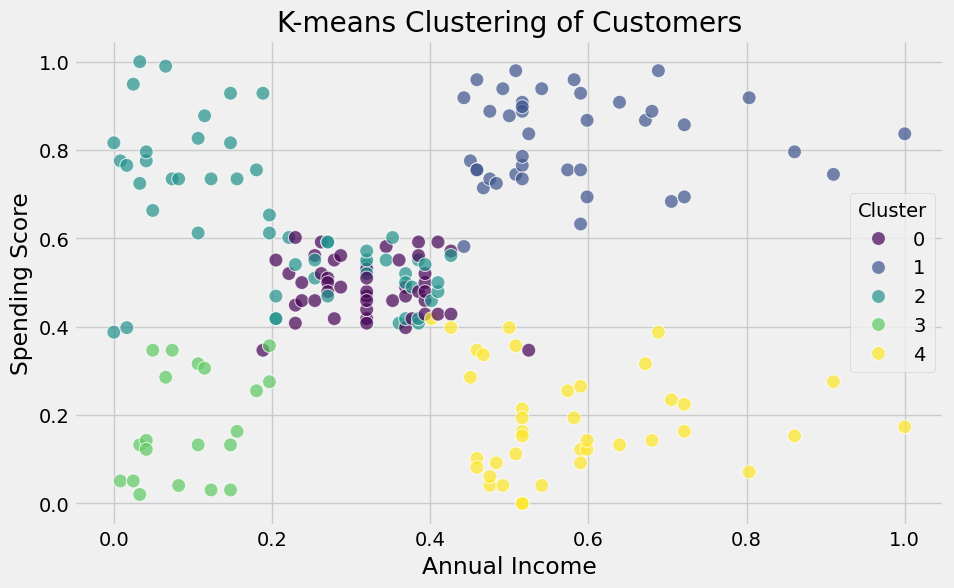

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Mall_df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('K-means Clustering of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Initialize the AgglomerativeClustering model with a specified number of clusters (e.g., 3)
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model and predict the clusters
clusters = agg_clustering.fit_predict(scaled_df)

# Add the cluster labels to the original DataFrame
Mall_df['Cluster'] = clusters

print("Clustered Data:\n", Mall_df)


Clustered Data:
      Gender       Age  Annual_Income  Spending_Score  Cluster
0         1  0.019231       0.000000        0.387755        0
1         1  0.057692       0.000000        0.816327        1
2         0  0.038462       0.008197        0.051020        0
3         0  0.096154       0.008197        0.775510        1
4         0  0.250000       0.016393        0.397959        0
..      ...       ...            ...             ...      ...
195       0  0.326923       0.860656        0.795918        2
196       0  0.519231       0.909836        0.275510        0
197       1  0.269231       0.909836        0.744898        2
198       1  0.269231       1.000000        0.173469        0
199       1  0.230769       1.000000        0.836735        2

[200 rows x 5 columns]


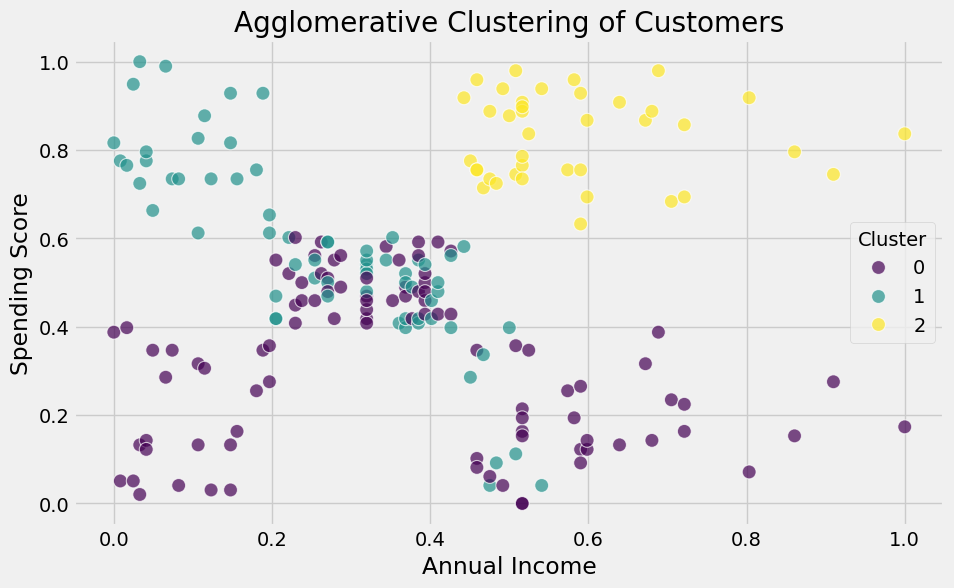

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Mall_df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Agglomerative Clustering of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

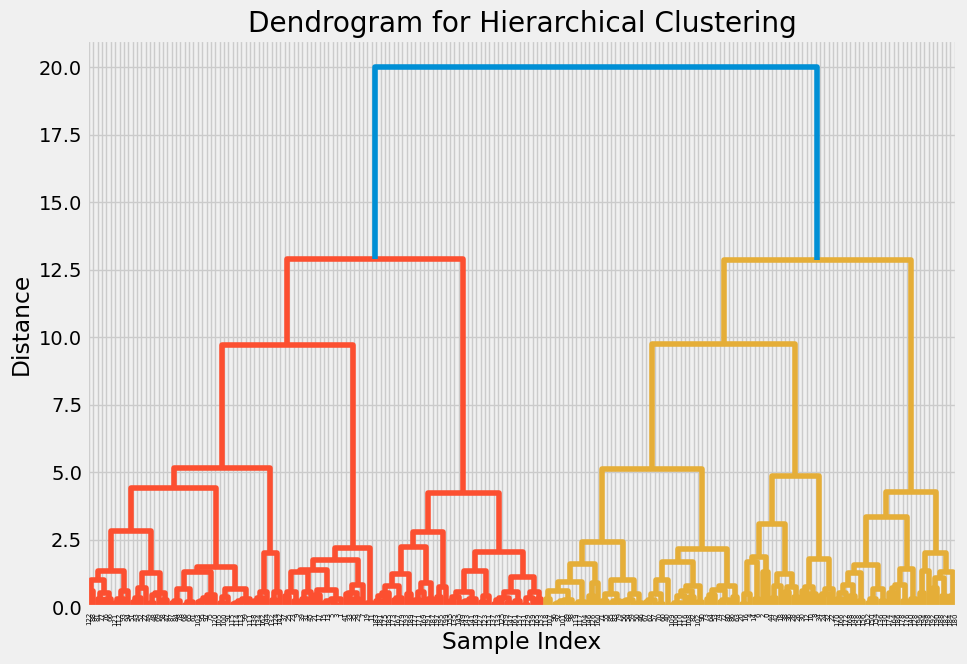

In [ ]:
# Plot the dendrogram
linked = linkage(scaled_df, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=Mall_df.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Clustered Data:
      Gender       Age  Annual_Income  Spending_Score  Cluster
0         1  0.019231       0.000000        0.387755       -1
1         1  0.057692       0.000000        0.816327        0
2         0  0.038462       0.008197        0.051020       -1
3         0  0.096154       0.008197        0.775510        0
4         0  0.250000       0.016393        0.397959        1
..      ...       ...            ...             ...      ...
195       0  0.326923       0.860656        0.795918       -1
196       0  0.519231       0.909836        0.275510       -1
197       1  0.269231       0.909836        0.744898       -1
198       1  0.269231       1.000000        0.173469       -1
199       1  0.230769       1.000000        0.836735       -1

[200 rows x 5 columns]


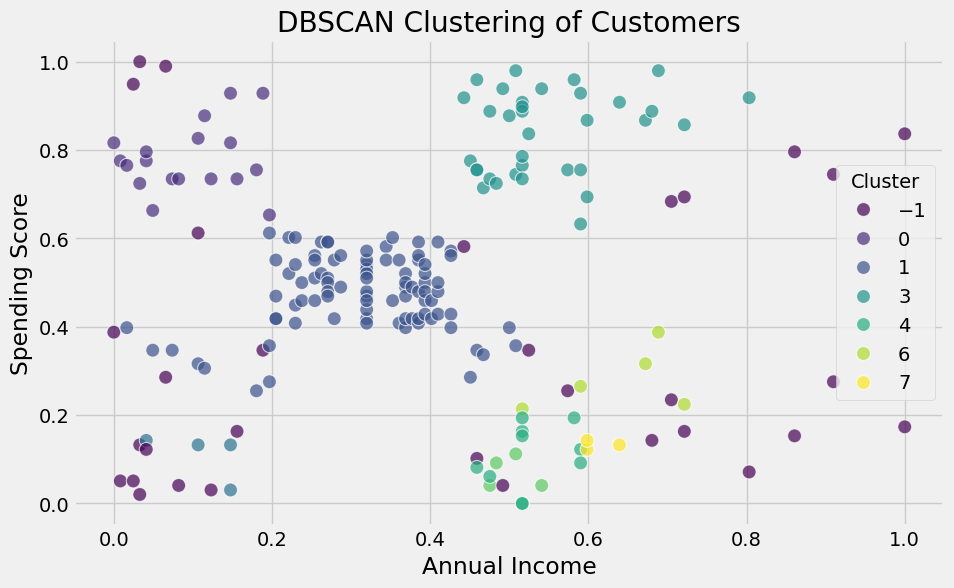

In [ ]:
from sklearn.cluster import DBSCAN
# Initialize the DBSCAN model with specified parameters
dbscan = DBSCAN(eps=0.5, min_samples=3)

# Fit the model and predict the clusters
clusters = dbscan.fit_predict(scaled_df)

# Add the cluster labels to the original DataFrame
Mall_df['Cluster'] = clusters

print("Clustered Data:\n", Mall_df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Mall_df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()


* **K-means**: Use when the number of clusters is known or reasonably estimated, and when clusters are well-separated and roughly spherical.
* **Agglomerative Clustering**: Use when exploring hierarchical relationships in data or when the number of clusters is not known in advance.
* **DBSCAN**: Use when dealing with noise, outliers, and clusters of arbitrary shape and size, and when you don't have prior knowledge of the number of clusters.

Cluster Centers (Unscaled):
         Age  Annual Income (k$)  Spending Score (1-100)
0  55.638298           54.382979               48.851064
1  32.875000           86.100000               81.525000
2  25.185185           41.092593               62.240741
3  46.250000           26.750000               18.350000
4  39.871795           86.102564               19.358974

Cluster Sizes:
Cluster
0    47
1    40
2    54
3    20
4    39
Name: count, dtype: int64


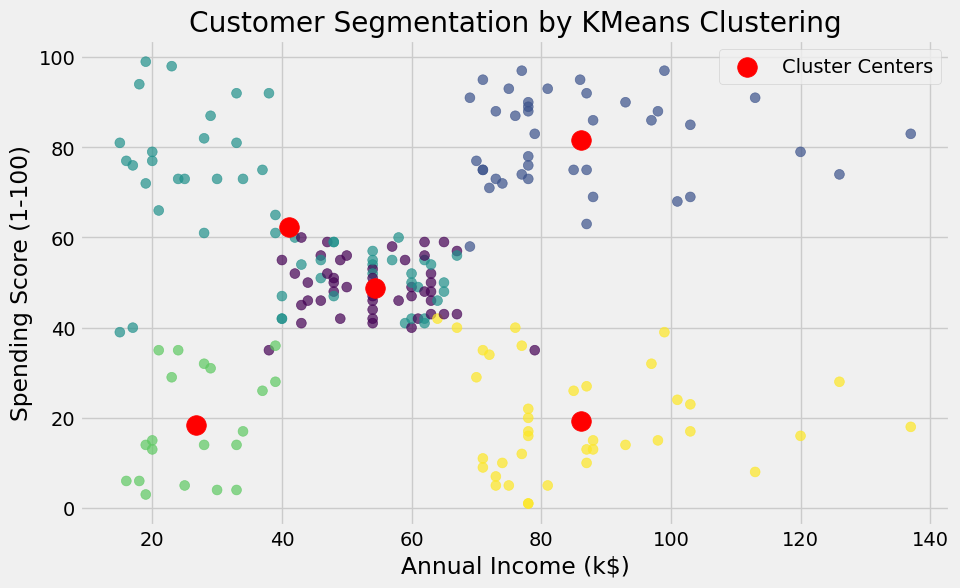

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load and Prepare Data
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
df = pd.read_csv(url)

# Select relevant features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Step 2: Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Step 4: Analyze and Interpret Clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Back transform centers to original scale
df['Cluster'] = df['Cluster'].astype('category')

# Display cluster centers and sizes
print("Cluster Centers (Unscaled):")
print(pd.DataFrame(cluster_centers, columns=X.columns))

cluster_sizes = df['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)

# Visualization of cluster characteristics
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 2], marker='o', s=200, color='red', label='Cluster Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation by KMeans Clustering')
plt.legend()
plt.grid(True)
plt.show()



###1. KMeans Clustering

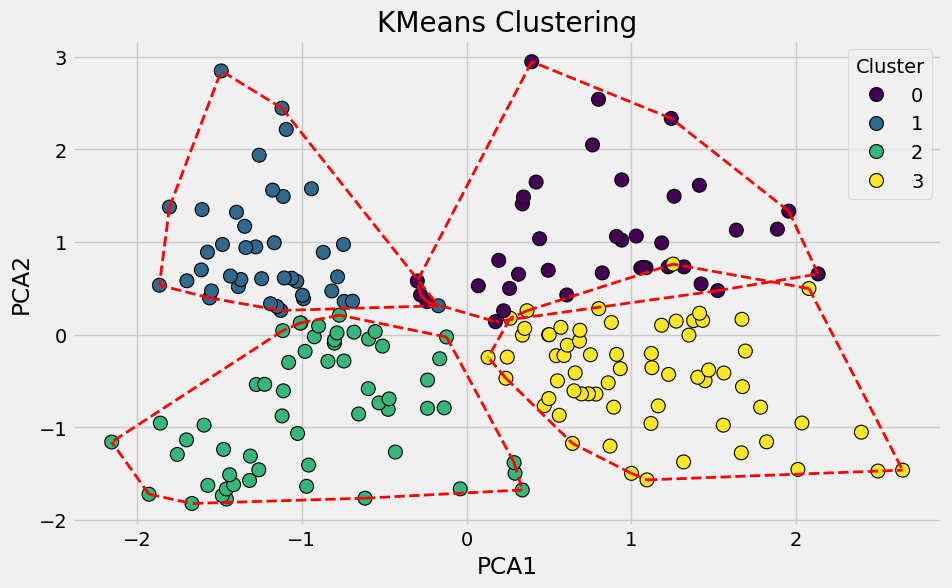

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Load and Prepare Data
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
data = pd.read_csv(url)

# Select features and standardize them
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Create a new DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, edgecolor='k')

# Draw convex hulls
for cluster in range(4):
    points = pca_df[pca_df['Cluster'] == cluster][['PCA1', 'PCA2']].values
    if len(points) > 2:  # Convex hull requires at least 3 points
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'r--', lw=2)

plt.title('KMeans Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


###2. Hierarchical Clustering (Agglomerative Clustering)

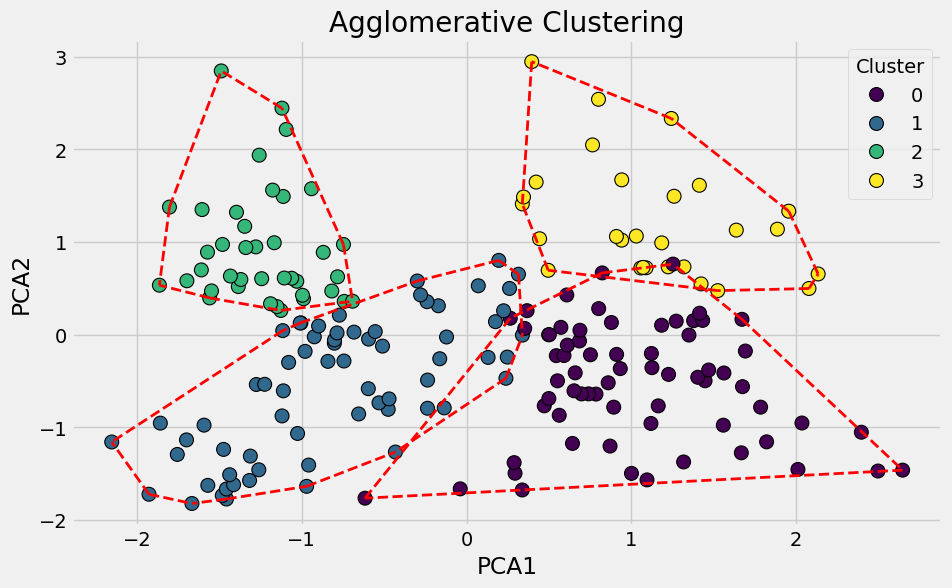

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
clusters = agglo.fit_predict(X_scaled)

# Create a new DataFrame with PCA results and cluster labels
pca_df['Cluster'] = clusters

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, edgecolor='k')

# Draw convex hulls
for cluster in range(4):
    points = pca_df[pca_df['Cluster'] == cluster][['PCA1', 'PCA2']].values
    if len(points) > 2:  # Convex hull requires at least 3 points
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'r--', lw=2)

plt.title('Agglomerative Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()



### 3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)


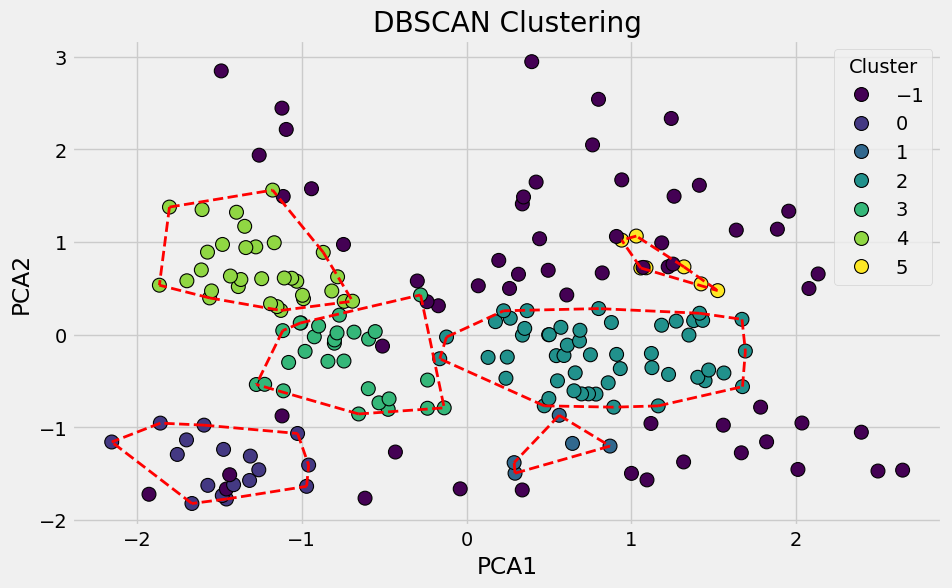

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Create a new DataFrame with PCA results and cluster labels
pca_df['Cluster'] = clusters

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, edgecolor='k')

# Draw convex hulls
unique_clusters = np.unique(clusters)
for cluster in unique_clusters:
    if cluster == -1:  # DBSCAN labels noise as -1
        continue
    points = pca_df[pca_df['Cluster'] == cluster][['PCA1', 'PCA2']].values
    if len(points) > 2:  # Convex hull requires at least 3 points
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'r--', lw=2)

plt.title('DBSCAN Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()



###4. Gaussian Mixture Model (GMM)

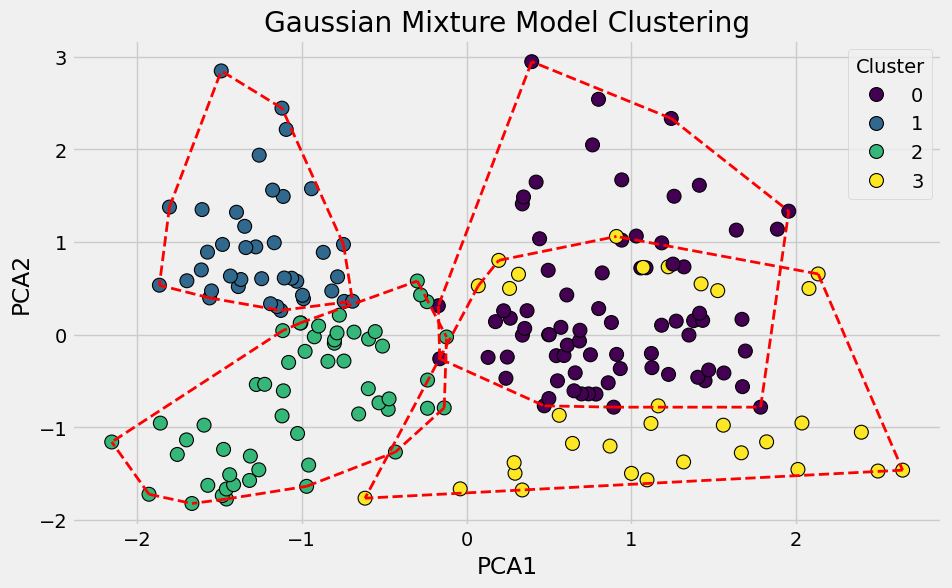

In [ ]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=4, random_state=42)
clusters = gmm.fit_predict(X_scaled)

# Create a new DataFrame with PCA results and cluster labels
pca_df['Cluster'] = clusters

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, edgecolor='k')

# Draw convex hulls
for cluster in range(4):
    points = pca_df[pca_df['Cluster'] == cluster][['PCA1', 'PCA2']].values
    if len(points) > 2:  # Convex hull requires at least 3 points
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'r--', lw=2)

plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()




###5. Mean Shift Clustering

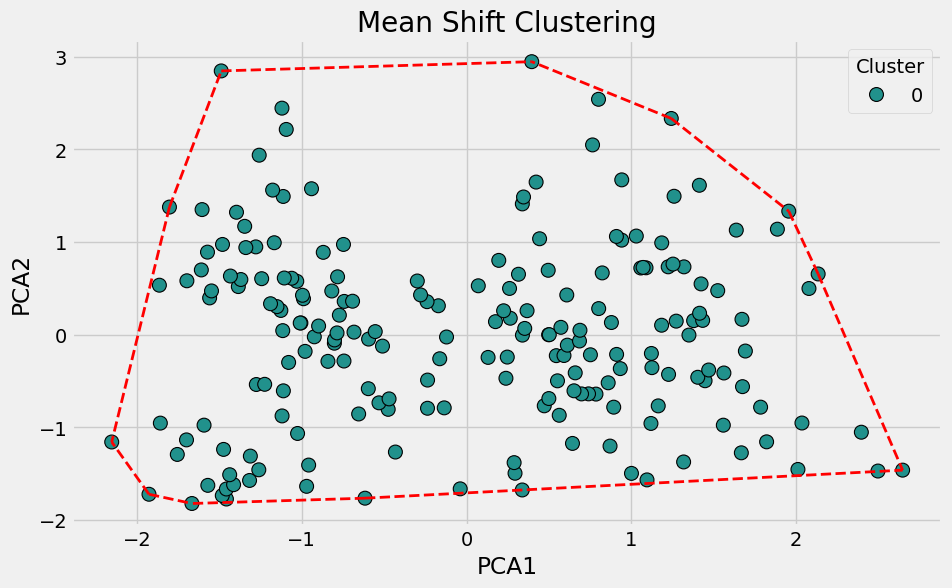

In [ ]:
from sklearn.cluster import MeanShift

# Apply Mean Shift Clustering
meanshift = MeanShift()
clusters = meanshift.fit_predict(X_scaled)

# Create a new DataFrame with PCA results and cluster labels
pca_df['Cluster'] = clusters

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, edgecolor='k')

# Draw convex hulls
unique_clusters = np.unique(clusters)
for cluster in unique_clusters:
    points = pca_df[pca_df['Cluster'] == cluster][['PCA1', 'PCA2']].values
    if len(points) > 2:  # Convex hull requires at least 3 points
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'r--', lw=2)

plt.title('Mean Shift Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()



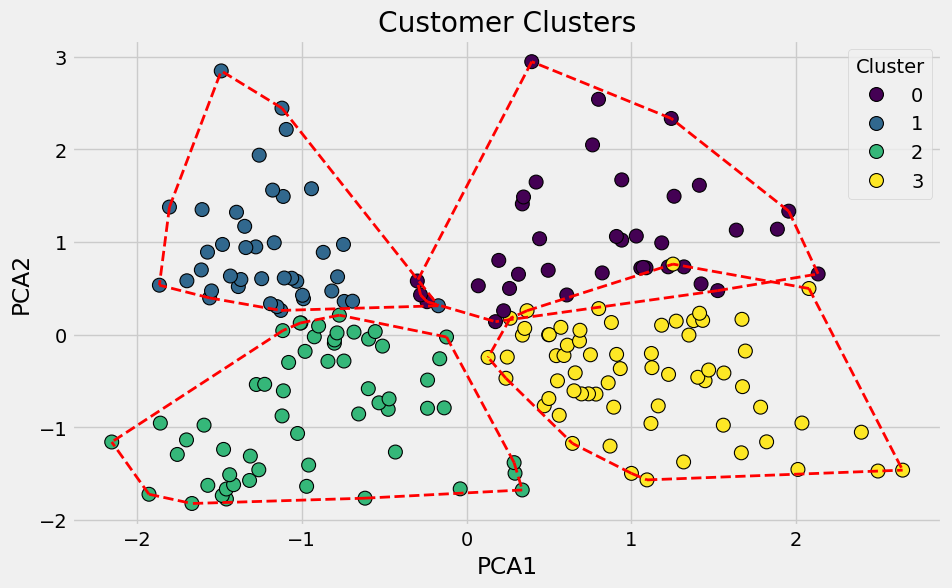

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Load and Prepare Data
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
df = pd.read_csv(url)
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add PCA columns and cluster labels to DataFrame
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]
df['Cluster'] = clusters

# Visualize the clusters with convex hulls
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100, edgecolor='k')

# Add convex hulls around clusters
for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster][['PCA1', 'PCA2']].values
    if len(cluster_data) > 2:  # Convex hull requires at least 3 points
        hull = ConvexHull(cluster_data)
        for simplex in hull.simplices:
            plt.plot(cluster_data[simplex, 0], cluster_data[simplex, 1], 'r--', lw=2)

plt.title('Customer Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


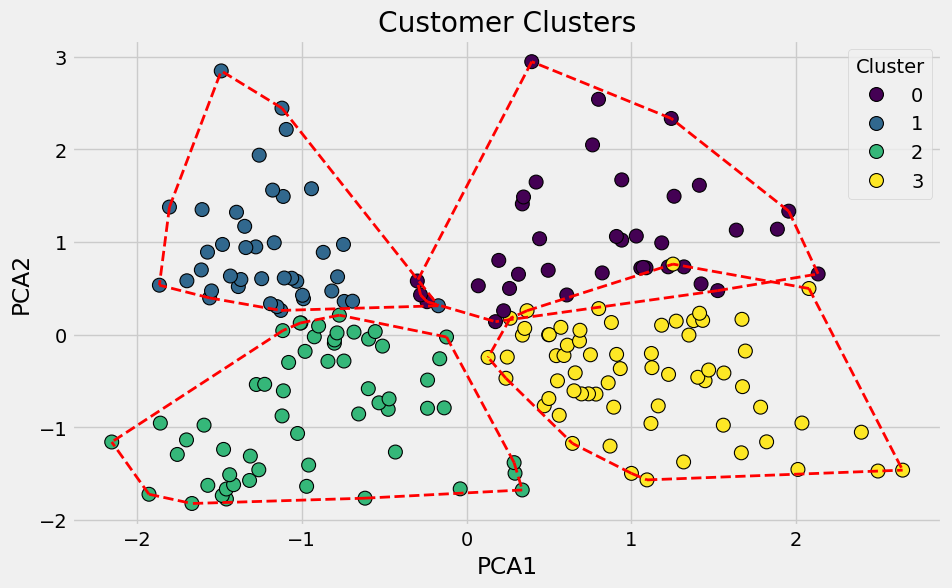

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Step 1: Load and Prepare Data
def load_and_prepare_data(url):
    df = pd.read_csv(url)
    features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    return df, features

# Step 2: Standardize the Features
def standardize_features(features):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    return scaled_features

# Step 3: Apply PCA
def apply_pca(scaled_features, n_components=2):
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(scaled_features)
    return pca_features

# Step 4: Apply Clustering Algorithm (KMeans)
def apply_kmeans(scaled_features, n_clusters=4, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(scaled_features)
    return clusters

# Step 5: Add PCA and Cluster Data to DataFrame
def add_pca_and_clusters(df, pca_features, clusters):
    df['PCA1'] = pca_features[:, 0]
    df['PCA2'] = pca_features[:, 1]
    df['Cluster'] = clusters
    return df

# Step 6: Visualize Clusters with Convex Hulls
def visualize_clusters_with_hulls(df, n_clusters=4):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100, edgecolor='k')

    for cluster in range(n_clusters):
        cluster_data = df[df['Cluster'] == cluster][['PCA1', 'PCA2']].values
        if len(cluster_data) > 2:  # Convex hull requires at least 3 points
            hull = ConvexHull(cluster_data)
            for simplex in hull.simplices:
                plt.plot(cluster_data[simplex, 0], cluster_data[simplex, 1], 'r--', lw=2)

    plt.title('Customer Clusters')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()

# Main Function to Execute Steps
def main():
    url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
    df, features = load_and_prepare_data(url)
    scaled_features = standardize_features(features)
    pca_features = apply_pca(scaled_features)
    clusters = apply_kmeans(scaled_features)
    df = add_pca_and_clusters(df, pca_features, clusters)
    visualize_clusters_with_hulls(df)

# Execute the Main Function
if __name__ == "__main__":
    main()


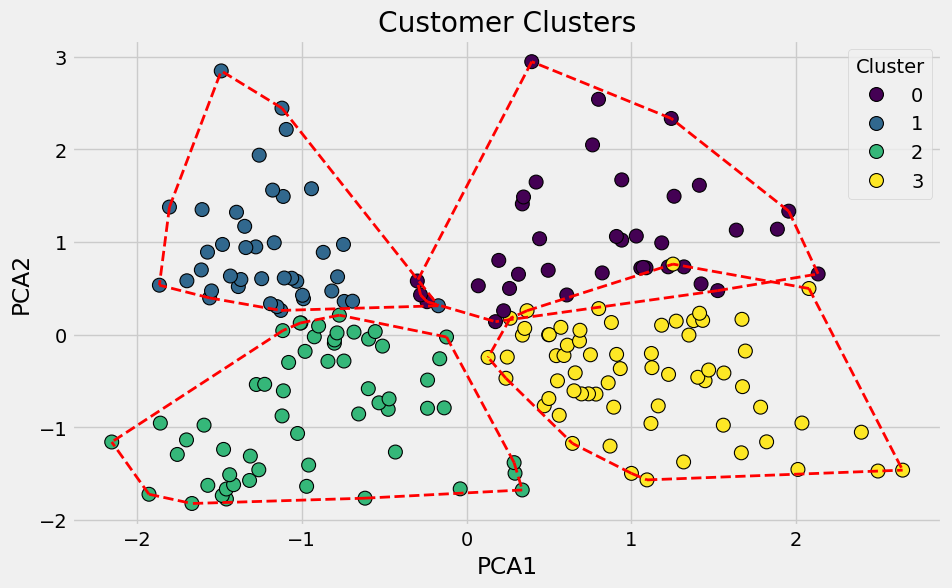

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Load and Prepare Data
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
data = pd.read_csv(url)

# Select features and standardize them
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Create a new DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, edgecolor='k')

# Draw convex hulls
for cluster in range(4):
    points = pca_df[pca_df['Cluster'] == cluster][['PCA1', 'PCA2']].values
    if len(points) > 2:  # Convex hull requires at least 3 points
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'r--', lw=2)

plt.title('Customer Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


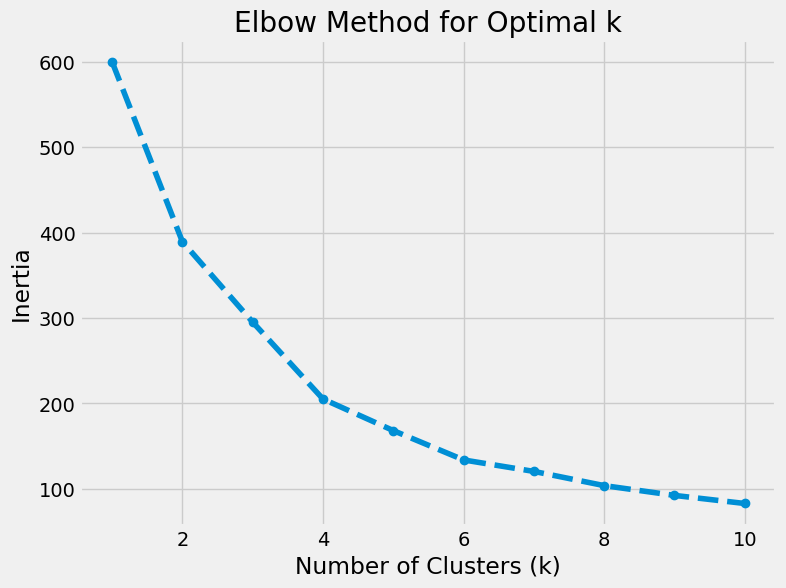

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_scaled is your standardized data
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


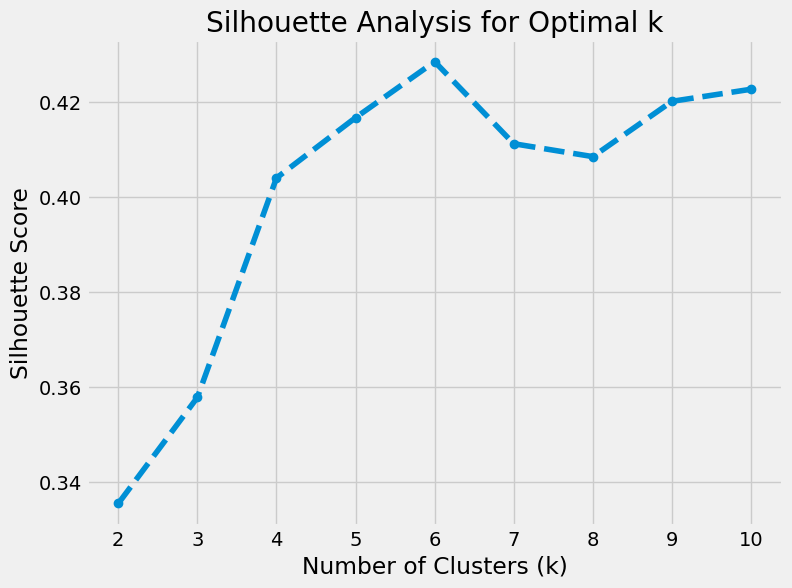

The optimal number of clusters is: 6


In [ ]:
import numpy as np

# Your existing code to calculate silhouette scores and plot them
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

# Finding the optimal number of clusters
optimal_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f'The optimal number of clusters is: {optimal_k}')


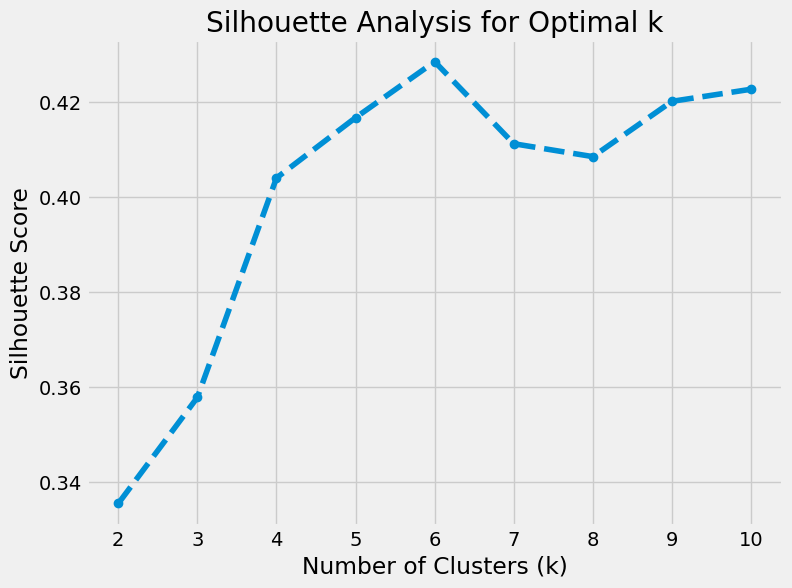

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()


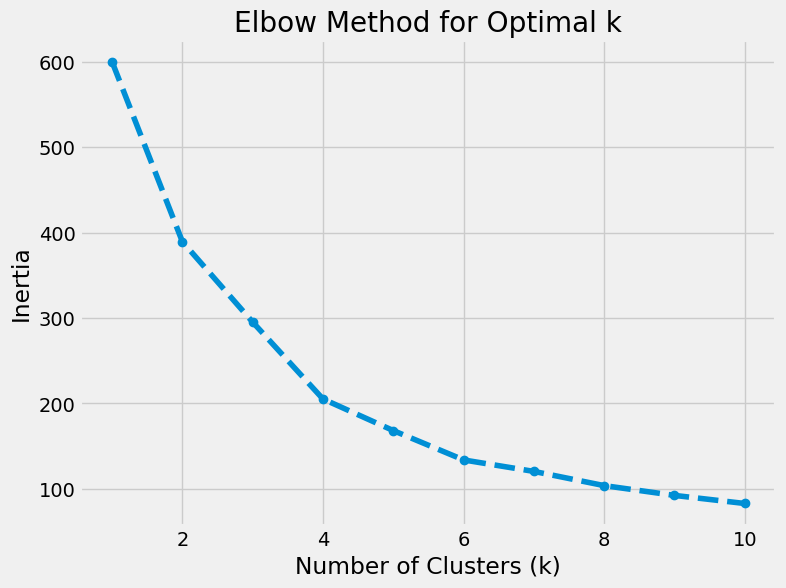

The optimal number of clusters is: 6


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_scaled is your standardized data
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Finding the optimal number of clusters
optimal_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f'The optimal number of clusters is: {optimal_k}')
